<a href="https://colab.research.google.com/github/ChenSeanH/PS4HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [74]:
train_data = pd.read_csv('https://raw.githubusercontent.com/ChenSeanH/PS4HouseDataExercise/master/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/ChenSeanH/PS4HouseDataExercise/master/test.csv')
train_data.shape

train = train_data.iloc[0:1000,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [57]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

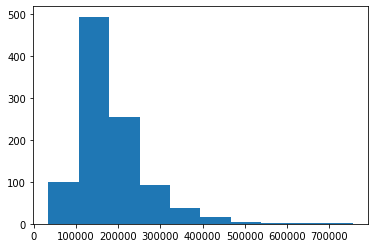

In [58]:
# plot hist
plt.hist(train['SalePrice'])

In [ ]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 38)

In [63]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:25].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'ScreenPorch'],
      dtype='object')

In [64]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X = X.fillna(0)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,FullBath,YearBuilt,YearRemodAdd,...,LotFrontage,2ndFlrSF,WoodDeckSF,OpenPorchSF,HalfBath,LotArea,BsmtUnfSF,BsmtFullBath,BedroomAbvGr,ScreenPorch
0,7,1710,2,548,856,856,8,2,2003,2003,...,65.0,854,0,61,1,8450,150,1,3,0
1,6,1262,2,460,1262,1262,6,2,1976,1976,...,80.0,0,298,0,0,9600,284,0,3,0
2,7,1786,2,608,920,920,6,2,2001,2002,...,68.0,866,0,42,1,11250,434,1,3,0
3,7,1717,3,642,756,961,7,1,1915,1970,...,60.0,756,0,35,0,9550,540,1,3,0
4,8,2198,3,836,1145,1145,9,2,2000,2000,...,84.0,1053,192,84,1,14260,490,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,1230,1,305,747,774,5,1,1946,1950,...,51.0,456,0,57,1,4712,363,1,3,63
996,5,1050,1,368,1050,1050,6,1,1961,1961,...,0.0,0,0,319,0,10659,135,1,3,0
997,6,1442,2,615,1442,1442,6,2,1970,1970,...,0.0,0,371,0,0,11717,1442,0,2,0
998,3,1077,1,210,1007,1077,6,1,1922,1950,...,60.0,0,0,100,0,9786,1007,0,3,0


In [65]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [66]:
# How good is the model
model.score(X,Y)


0.844232809756747

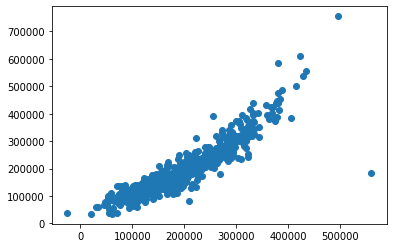

In [67]:
# Scatter plot of predictions
plt.scatter(predictions, Y)